<a href="https://colab.research.google.com/github/educhel/L03_Data_Analysis/blob/main/0112_%EA%B0%95%EC%9D%98%EC%A7%84%ED%96%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

복습
===

**코드에 대한 설명, 혹은 담고 있는 맥락** 등 -> `문서화`를 위한 기능
> 마크다운 문법 적용 가능

In [1]:
# 코드 셀에서는 파이썬 문법 인식하여, 코드 실행 할 수 있음
print('여러분! 오늘도 좋은 하루입니다 :)')

여러분! 오늘도 좋은 하루입니다 :)


In [2]:
x = 10
y = 20

x
y # 객체 표시는 가장 마지막 객체만 표시

20

In [3]:
# (참고) 만일 하나의 셀에서 여러 객체를 표시하고 싶다면?

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
x = 10
y = 20

x
y

10

20

In [5]:
users = [
    {"user_id":1,"age":25,"country":"KR","is_paid":False},
    {"user_id":2,"age":32,"country":"KR","is_paid":True},
    {"user_id":3,"age":29,"country":"US","is_paid":False},
    {"user_id":4,"age":41,"country":"US","is_paid":True},
    {"user_id":5,"age":36,"country":"KR","is_paid":True},
]
users

[{'user_id': 1, 'age': 25, 'country': 'KR', 'is_paid': False},
 {'user_id': 2, 'age': 32, 'country': 'KR', 'is_paid': True},
 {'user_id': 3, 'age': 29, 'country': 'US', 'is_paid': False},
 {'user_id': 4, 'age': 41, 'country': 'US', 'is_paid': True},
 {'user_id': 5, 'age': 36, 'country': 'KR', 'is_paid': True}]

In [6]:
import pandas as pd

In [7]:
# 데이터 프레임 생성
df = pd.DataFrame(users)
df

,user_id,age,country,is_paid
0,1,25,KR,False
1,2,32,KR,True
2,3,29,US,False
3,4,41,US,True
4,5,36,KR,True


In [8]:
# 유료 사용자(is_paid == True)의 나이만 출력해 보세요.
df.loc[df['is_paid'] == True, 'age']

,age
1,32
3,41
4,36


In [9]:
df[df['age'] >= 30]

,user_id,age,country,is_paid
1,2,32,KR,True
3,4,41,US,True
4,5,36,KR,True


In [10]:
# 데이터 프레임 필터링 후, 길이를 확인한다.
# -> 헷갈릴 수 있다. 행/열 어디가 길이지?
len(df[df['age'] >= 30])

3

In [11]:
# 데이터 구조 확인
# -> (행,열) 튜플의 0번째 위치 값만 뽑는다.

df[df['age']>=30].shape[0]

3

In [12]:
# 전체 사용자의 평균 나이를 계산해 보세요.

df['age'].mean()

np.float64(32.6)

In [13]:
# 유료 사용자만의 평균 나이를 계산해 보세요.

df.loc[df['is_paid'] == True,'age'].mean()

np.float64(36.333333333333336)

In [14]:
df.shape[0]

5

In [15]:
# 유료 사용자 판별 조건
df['is_paid'] == True

,is_paid
0,False
1,True
2,False
3,True
4,True


In [16]:
# 합산 시에, True => 1 , False => 0으로 환산하여 계산

sum(df['is_paid'] == True)

3

> 사용자 유형 별 수
- 전체 사용자의 수는 5명, 유료사용자의 수는 3명
- 전체 결제자 비중 0.6, 60%

> 나이 평균 차이
- 전체 32.6 세
- 유료 결제자 36.3 세


## (1) 데이터 불러오기

In [17]:
!pwd

/content


In [18]:
!ls

sample_data


- 드라이브를 자동으로 연결지어 주지 않기 때문에 직접 연결 필요
- 쓰고 / 읽기 -> 데이터를 바꿀 수 있음 / 수정 가능
- 단순히 드라이브에 있다고 해서 연결해주는 것은 위험  
=> 드라이브 마운트 필요


In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
# 절대경로로 불러오는 방법
path = '/content/drive/MyDrive/새싹2기/데이터분석/data/titanic.csv'

titanic = pd.read_csv(path)

## (2) 데이터 확인하기

In [21]:
# 구조확인
titanic.shape

(891, 15)

In [22]:
# 미리보기
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [23]:
titanic.tail(n=2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [24]:
# 데이터 타입 확인 (컬럼별 자료형)

titanic.dtypes

,0
survived,int64
pclass,int64
sex,object
age,float64
sibsp,int64
parch,int64
fare,float64
embarked,object
class,object
who,object


In [25]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


## (3) 데이터 정렬하기
> `titanic.sort_*`  
=> 2차원 구조이기 때문에 정렬의 기준 / 방식을 선택

- 값 기준 정렬 : sort_values()
- 행 이름 기준 정렬 : sort_index()

In [26]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [27]:
# by 열의 값을 기준으로 내림차순 정렬
# 새로운 데이터 프레임 반환

titanic.sort_values(by='fare', ascending=False)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True
88,1,1,female,23.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
438,0,1,male,64.0,1,4,263.0000,S,First,man,True,C,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,0,1,male,39.0,0,0,0.0000,S,First,man,True,A,Southampton,no,True
815,0,1,male,NaN,0,0,0.0000,S,First,man,True,B,Southampton,no,True
466,0,2,male,NaN,0,0,0.0000,S,Second,man,True,NaN,Southampton,no,True
481,0,2,male,NaN,0,0,0.0000,S,Second,man,True,NaN,Southampton,no,True


In [28]:
titanic.sort_values(by='fare', ascending=False, inplace=True)

In [29]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True
88,1,1,female,23.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
438,0,1,male,64.0,1,4,263.0000,S,First,man,True,C,Southampton,no,False


In [30]:
titanic.sort_index(inplace=True)

In [31]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## (4) 범주형 자료 확인하기

In [32]:
titanic.dtypes

,0
survived,int64
pclass,int64
sex,object
age,float64
sibsp,int64
parch,int64
fare,float64
embarked,object
class,object
who,object


In [33]:
titanic['sex'].unique()

array(['male', 'female'], dtype=object)

In [34]:
titanic['sex'].nunique()

2

In [35]:
# 딱 하나만 외운다면, 무조건 value_counts!
# 각 고유한 값의 갯수 세는 메서드

vc = titanic['sex'].value_counts()
vc

,count
sex,
male,577
female,314


In [36]:
titanic['sex'].value_counts(normalize=True)

,proportion
sex,
male,0.647587
female,0.352413


In [37]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 99.2+ KB


In [38]:
# 결측치 포함하여, 확인 가능
titanic['deck'].value_counts(dropna=False)

,count
deck,
NaN,688
C,59
B,47
D,33
E,32
A,15
F,13
G,4


In [39]:
vc.shape

(2,)

## (5) 수치형 자료 확인하기

In [40]:
# 기술 통계량 확인

titanic.describe()

# int, float 등 숫자 계산이 가능한 자료형 대상 기술 통계량 확인
# 의미를 고려하지는 않음 -> 그냥 가능하면 다 보여준다.

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [41]:
titanic.dtypes

,0
survived,int64
pclass,int64
sex,object
age,float64
sibsp,int64
parch,int64
fare,float64
embarked,object
class,object
who,object


In [42]:
titanic.describe(include='object')

,sex,embarked,class,who,deck,embark_town,alive
count,891,889,891,891,203,889,891
unique,2,3,3,3,7,3,2
top,male,S,Third,man,C,Southampton,no
freq,577,644,491,537,59,644,549


In [43]:
titanic.describe(include='all')

# 모두다 볼수는 있지만 결측이 많이 포함되어 있기 때문에 분리해서 확인하는 것을 권장

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
titanic[titanic['class'] == titanic['class'].mode()[0]]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


In [45]:
titanic[titanic['fare'] == titanic['fare'].max()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True


In [46]:
titanic[titanic['fare'] >= titanic['fare'].quantile(0.90)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
31,1,1,female,NaN,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
34,0,1,male,28.0,1,0,82.1708,C,First,man,True,NaN,Cherbourg,no,False
61,1,1,female,38.0,0,0,80.0000,NaN,First,woman,False,B,NaN,yes,True
62,0,1,male,45.0,1,0,83.4750,S,First,man,True,C,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,1,1,female,62.0,0,0,80.0000,NaN,First,woman,False,B,NaN,yes,True
835,1,1,female,39.0,1,1,83.1583,C,First,woman,False,E,Cherbourg,yes,False
849,1,1,female,NaN,1,0,89.1042,C,First,woman,False,C,Cherbourg,yes,False
856,1,1,female,45.0,1,1,164.8667,S,First,woman,False,NaN,Southampton,yes,False


In [47]:
titanic['fare'].quantile(0.90)

np.float64(77.9583)

## (6) 데이터 선택하기 - 인덱싱

In [48]:
titanic.iloc[0]

,0
survived,0
pclass,3
sex,male
age,22.0
sibsp,1
parch,0
fare,7.25
embarked,S
class,Third
who,man


In [49]:
# titanic.iloc[0,['survived','sex','age','class','fare']]

In [50]:
titanic.loc[0:5,['survived','sex','age','class','fare']]

,survived,sex,age,class,fare
0,0,male,22.0,Third,7.2500
1,1,female,38.0,First,71.2833
2,1,female,26.0,Third,7.9250
3,1,female,35.0,First,53.1000
4,0,male,35.0,Third,8.0500
5,0,male,NaN,Third,8.4583


In [51]:
# 행의 이름
titanic.index

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       881, 882, 883, 884, 885, 886, 887, 888, 889, 890],
      dtype='int64', length=891)

In [52]:
# 열의 이름
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

`titanic.loc[행이름, 열이름]` 의 형태로 값을 선택한다.

(참고) 슬라이싱

슬라이싱은 loc, iloc 등 인덱서에서만 작동한다.

In [53]:
# 슬라이싱은 행, 열 모두 가능하다
# 다만, 연속된 구간에서만 가능
titanic.loc[100:105,'survived':'age']

,survived,pclass,sex,age
100,0,3,female,28.0
101,0,3,male,NaN
102,0,1,male,21.0
103,0,3,male,33.0
104,0,3,male,37.0
105,0,3,male,28.0


In [54]:
# 작동하지 않음
# titanic.loc[100:105,['survived':'age','fare','class']]

In [55]:
# 슬라이싱 적용 안됨
# titanic.drop(['deck':'alone'],axis=1)

## (7) 데이터 선택하기 - 필터링

In [56]:
# 조건식
titanic['sex'] == 'female'

,sex
0,False
1,True
2,True
3,True
4,False
...,...
886,False
887,True
888,True
889,False


In [57]:
# 자주 하는 실수

# titanic['sex'] == ['female']

# titanic['sex'] -> 시리즈
# ['female'] -> 리스트

# 둘다 여러개의 값이 들어갈 수 있는 컨테이너 -> 통째로 비교
#  ('Lengths must match to compare', (891,), (1,))

In [58]:
# 조건을 만족하는 경우에만 행 선택
titanic[titanic['sex'] == 'female']

# 똑같다!
# titanic.loc[titanic['sex'] == 'female']
# titanic.loc[titanic['sex'] == 'female',:]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [59]:
titanic[titanic['sex'] == 'male']

# 똑같다!
# titanic.loc[titanic['sex'] == 'male']
# titanic.loc[titanic['sex'] == 'male',:]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [60]:
titanic['sex'].value_counts()

,count
sex,
male,577
female,314


In [61]:
filtered_titanic = titanic.loc[titanic['fare'] > titanic['fare'].median()]

In [62]:
filtered_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [63]:
# 자주하는 실수
# 비트 연산자가 비트 연산의 대상을 잘 찾지 못함


# titanic.loc[titanic['sex'] == 'male' & titanic['survived'] == 0]

In [64]:
titanic.loc[(titanic['sex'] == 'male') & (titanic['survived'] == 0)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,0,3,male,33.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True


In [65]:
titanic['sex'].value_counts()

,count
sex,
male,577
female,314


## (8) 데이터 수정하기

In [66]:
# 값 수정

titanic.loc[888, 'age'] = 30

In [67]:
titanic.loc[888]

,888
survived,0
pclass,3
sex,female
age,30.0
sibsp,1
parch,2
fare,23.45
embarked,S
class,Third
who,woman


In [68]:
# 컬럼 정리하기

titanic.rename(columns={'sex':'gender'},inplace=True)

In [69]:
titanic.head()

,survived,pclass,gender,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [70]:
# 여러 컬럼명 변경
titanic.rename(columns={'sibsp':'sibling_spouse',
                        'parch':'parent_child'},inplace=True)

In [71]:
titanic.head(2)

,survived,pclass,gender,age,sibling_spouse,parent_child,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


## (9) 구조 수정과 정제

In [72]:
# 불필요한 컬럼 삭제
titanic.columns

Index(['survived', 'pclass', 'gender', 'age', 'sibling_spouse', 'parent_child',
       'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [73]:
titanic['deck'].value_counts(dropna=False)

,count
deck,
NaN,688
C,59
B,47
D,33
E,32
A,15
F,13
G,4


In [74]:
titanic2 = titanic.drop(columns=['deck'])

# 똑같다!
# titanic.drop(['deck'], axis=1)
# titanic.drop(['deck'], axis='columns')

In [75]:
titanic2.head()

,survived,pclass,gender,age,sibling_spouse,parent_child,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [76]:
# 중복 삭제
# 전체 열을 대상으로 중복 행을 확인할 수 있다.

titanic2.duplicated().sum()

np.int64(111)

In [77]:
# 복잡한 중복 제거 방법
titanic2.drop(index=titanic2[titanic2.duplicated()].index)

,survived,pclass,gender,age,sibling_spouse,parent_child,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,30.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [78]:
titanic2 = titanic2.drop_duplicates()

# 똑같다!
# titanic2.drop_duplicates(inplace=True)

In [79]:
titanic2.shape

(780, 14)

In [80]:
titanic.shape

(891, 15)

In [81]:
# 인덱스 확인
titanic2.tail(10) # 인덱스가 중간에 끊겨 있음

,survived,pclass,gender,age,sibling_spouse,parent_child,fare,embarked,class,who,adult_male,embark_town,alive,alone
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,Cherbourg,yes,False
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,Southampton,yes,False
881,0,3,male,33.0,0,0,7.8958,S,Third,man,True,Southampton,no,True
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,Southampton,no,True
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,30.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.7500,Q,Third,man,True,Queenstown,no,True


In [82]:
titanic2.index # 행 이름 -> 숫자로 표현한 것일 뿐!

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       879, 880, 881, 882, 883, 885, 887, 888, 889, 890],
      dtype='int64', length=780)

In [83]:
# titanic2.loc[886]

In [84]:
titanic2.reset_index(drop=True, inplace=True)

In [85]:
titanic2.tail()

,survived,pclass,gender,age,sibling_spouse,parent_child,fare,embarked,class,who,adult_male,embark_town,alive,alone
775,0,3,female,39.0,0,5,29.125,Q,Third,woman,False,Queenstown,no,False
776,1,1,female,19.0,0,0,30.000,S,First,woman,False,Southampton,yes,True
777,0,3,female,30.0,1,2,23.450,S,Third,woman,False,Southampton,no,False
778,1,1,male,26.0,0,0,30.000,C,First,man,True,Cherbourg,yes,True
779,0,3,male,32.0,0,0,7.750,Q,Third,man,True,Queenstown,no,True


## (10) 함수로 값 변환

In [86]:
# 딕셔너리로 맵핑
mapper_dict = {'male':'M','female':'F'}

mapper_dict['female']

'F'

In [87]:
# mapper_dict['man']

# 존재하지 않는 경우는 못해준다!

In [88]:
titanic2['gender'].map(mapper_dict)

,gender
0,M
1,F
2,F
3,F
4,M
...,...
775,F
776,F
777,F
778,M


In [89]:
titanic2.head()

,survived,pclass,gender,age,sibling_spouse,parent_child,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [90]:
titanic2['who'].map(mapper_dict)

# 맵퍼가 처리하지 못한 경우는 결측을 발생 시킬수 있음을 유의

,who
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
775,NaN
776,NaN
777,NaN
778,NaN


In [91]:
titanic2['embarked'].value_counts(dropna=False)

,count
embarked,
S,565
C,155
Q,58
NaN,2


In [92]:
titanic2['embarked_name'] = titanic2['embarked'].map({'S':'Southampton',
                                                    'C':'Cherbourg',
                                                    'Q':'Queenstown'})

In [93]:
titanic2['embarked_name'].value_counts(dropna=False)

,count
embarked_name,
Southampton,565
Cherbourg,155
Queenstown,58
NaN,2


데이터 전처리
===

## [1] Pandas로 간단 시각화

In [94]:
tips = pd.read_csv('/content/drive/MyDrive/새싹2기/데이터분석/data/tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [95]:
# 데이터 구조
tips.shape

(244, 7)

In [96]:
tips.dtypes

,0
total_bill,float64
tip,float64
sex,object
smoker,object
day,object
time,object
size,int64


In [97]:
tips.info()
# 수치형 변수 : float64(2), int64(1)
# 범주형 변수 : object(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [98]:
tips['total_bill'].describe()
# 데이터 전체를 요약한 통계량

,total_bill
count,244.000000
mean,19.785943
std,8.902412
min,3.070000
25%,13.347500
50%,17.795000
75%,24.127500
max,50.810000


### (1) `hist()`
단일 변수의 값 분포 확인

<Axes: ylabel='Frequency'>

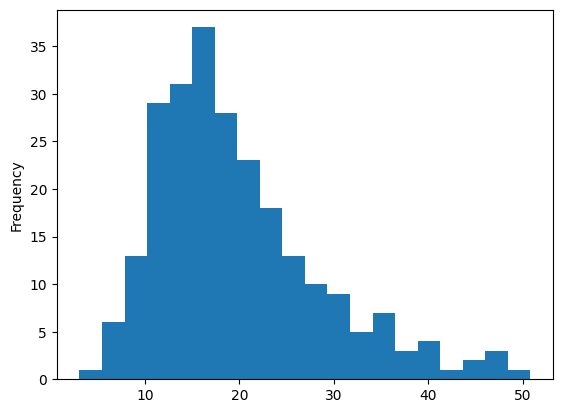

In [99]:
# tips['total_bill'] -> int

tips['total_bill'].plot(kind='hist',bins=20)

### (2) `box()`

데이터 분포와 이상치 파악

<Axes: >

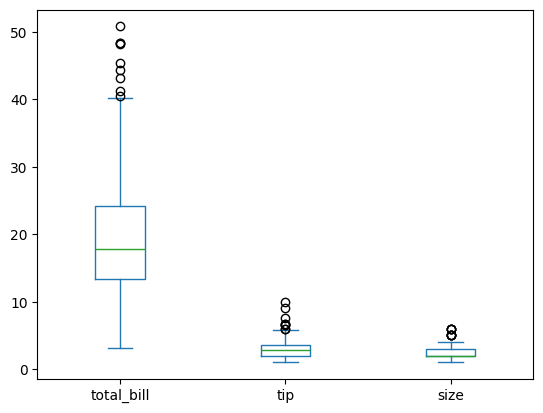

In [100]:
tips.plot.box()

# 수치형 데이터 -> 모두 하나의 그래프 상에 그려줌
# scale이 다른 경우는 잘 안보일 수 있으므로, 별도 컬럼을 분리해서 작성

<Axes: >

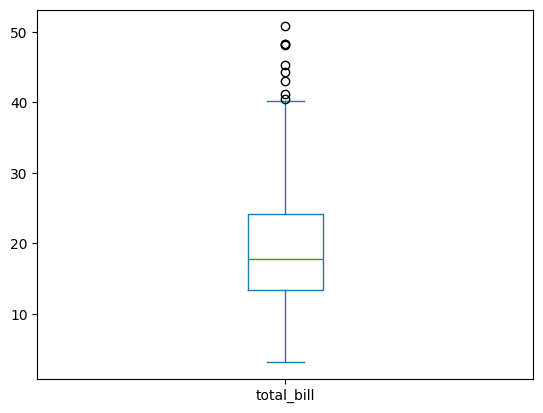

In [101]:
# series로 접근해서 plot
tips['total_bill'].plot(kind='box')

### (3) `scatter()`

두 수치형 변수 사이 관계를 확인한다.

점으로 나타내기 때문에, 대략적으로 알 수 있다.

<Axes: xlabel='total_bill', ylabel='tip'>

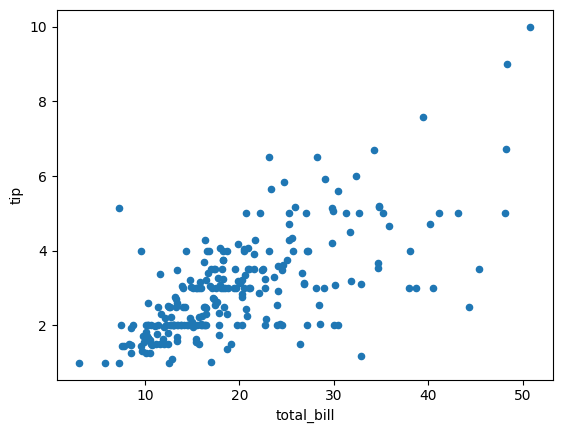

In [102]:
tips.plot.scatter(x='total_bill',y='tip')

### (4) `bar()`

막대그래프는 값 크기 비교
-> 집계된 숫자를 기준으로 비교


In [103]:
# tips['day'].plot.bar()
# 막대를 그리기 위해서는 숫자가 필요함

In [104]:
vc = tips['day'].value_counts(sort=False).reindex(['Thur','Fri','Sat','Sun'])
vc # 외우지 말 것! -> 불편함

,count
day,
Thur,62
Fri,19
Sat,87
Sun,76


<Axes: xlabel='day'>

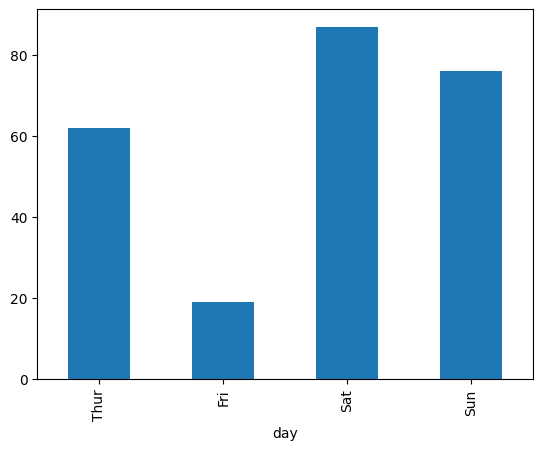

In [105]:
vc.plot.bar()

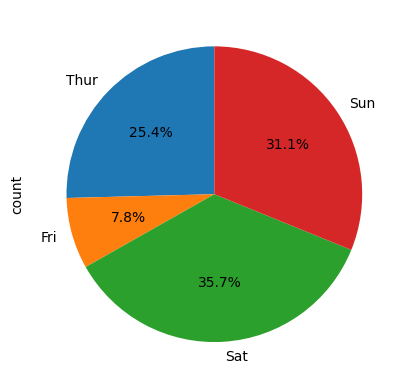

In [106]:
vc.plot.pie(autopct='%1.1f%%',startangle=90);

## [2] 결측치 처리

### (1) 결측치 확인

> 값으로 확인하기

In [108]:
# 각 셀별로 결측인지 아닌지를 True/False 로 보여주는 데이터 프레임 반환
titanic.isnull()

,survived,pclass,gender,age,sibling_spouse,parent_child,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [110]:
# 열별로 합산
# 열별로 몇개씩 결측이 발생하고 있는지 확인 가능

titanic.isnull().sum()

,0
survived,0
pclass,0
gender,0
age,176
sibling_spouse,0
parent_child,0
fare,0
embarked,2
class,0
who,0


<Axes: >

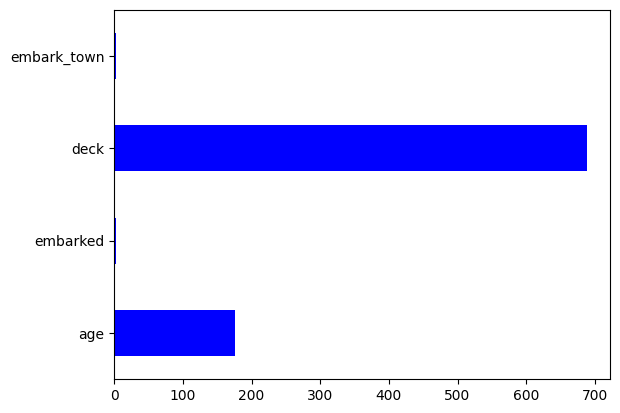

In [114]:
missing_values = titanic.isnull().sum()
missing_values[missing_values > 0].plot.barh(color='blue')

### (2) 결측치 처리 전략  - 제거

In [115]:
# 결측치 발생한 모든 행 삭제
titanic_clean = titanic.dropna()
titanic_clean.shape

(182, 15)

In [116]:
titanic.shape

(891, 15)

In [119]:
# 열 삭제
titanic_clean = titanic.dropna(axis='columns')
titanic_clean.shape
# 4개의 결측 발생 열 삭제됨을 확인

(891, 11)

In [120]:
4 * titanic.shape[0]

3564

In [123]:
titanic_clean = titanic.drop(columns=['deck']).dropna(subset=['embarked','embark_town'])

In [125]:
titanic_clean.isnull().sum()

,0
survived,0
pclass,0
gender,0
age,176
sibling_spouse,0
parent_child,0
fare,0
embarked,0
class,0
who,0


In [126]:
titanic_clean.shape

(889, 14)

In [128]:
titanic_clean['age'].isnull().sum()

np.int64(176)

In [131]:
titanic_clean.fillna(titanic['age'].median())

,survived,pclass,gender,age,sibling_spouse,parent_child,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,30.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [132]:
titanic['age'].median()

28.0

In [133]:
titanic['who'].value_counts()

,count
who,
man,537
woman,271
child,83


In [135]:
# 만약 who가 child 이면서, age가 결측치인 데이터가 있다면?
# 중앙값으로 fillna 하는데 논리적으로 옳지 못함

titanic_clean.loc[(titanic_clean['who'] == 'child')
                    &
                  (titanic_clean['age'].isnull())]

,survived,pclass,gender,age,sibling_spouse,parent_child,fare,embarked,class,who,adult_male,embark_town,alive,alone
